# Learning Logistic Regression

**Dataset used:**
- Titanic Dataset: https://www.kaggle.com/c/titanic/data?select=train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

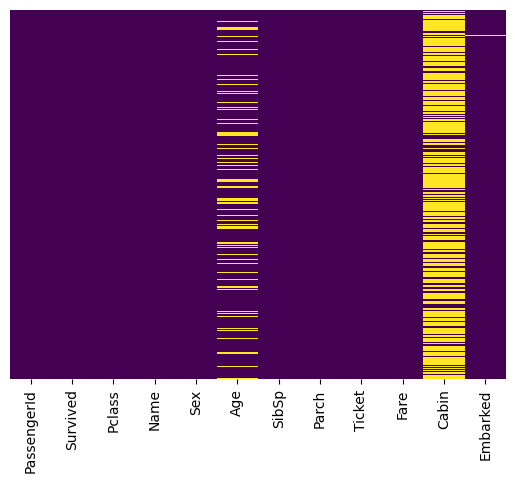

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [7]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

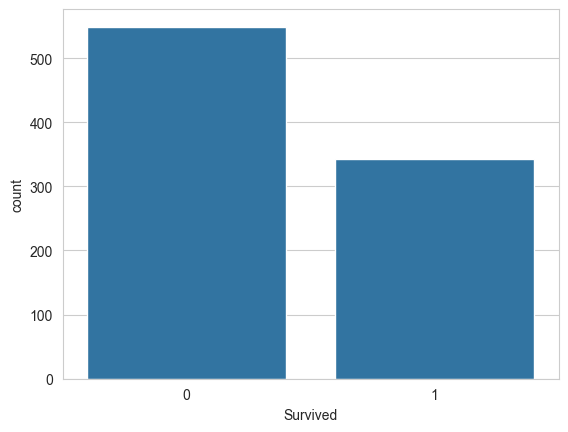

In [8]:
sns.barplot(train["Survived"].value_counts())

<Axes: xlabel='Survived', ylabel='count'>

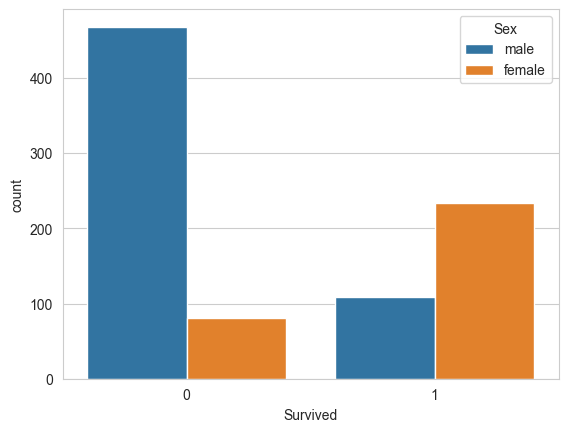

In [9]:
sns.countplot(data=train,x="Survived",hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

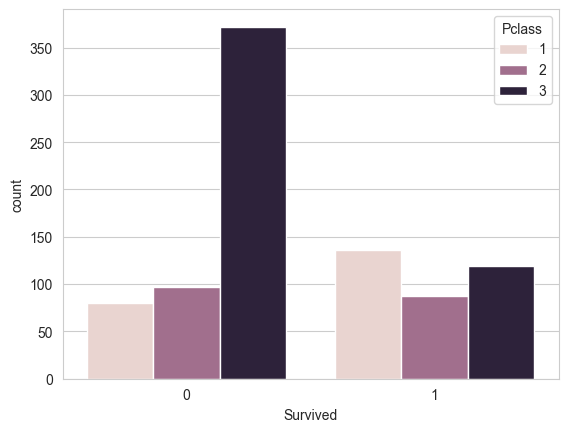

In [10]:
sns.countplot(data=train,x="Survived",hue="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

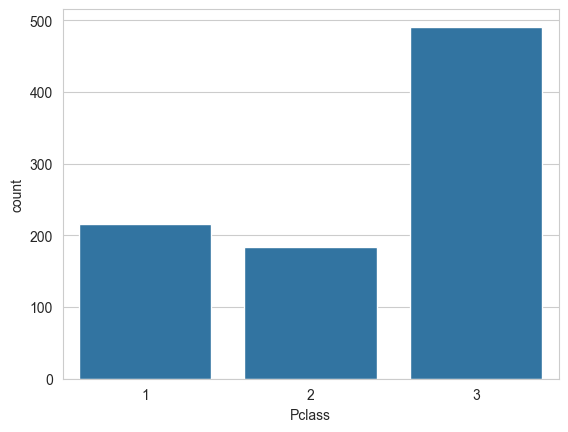

In [11]:
sns.countplot(train,x="Pclass")

In [12]:
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train["Age"].isnull().sum()

np.int64(177)

<Axes: xlabel='Age', ylabel='Count'>

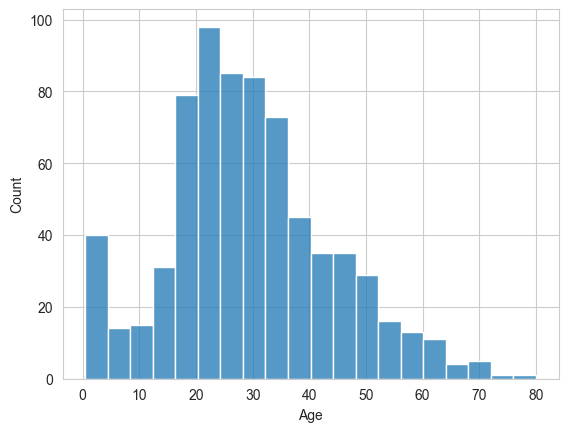

In [15]:
sns.histplot(train["Age"].dropna(),bins=20)

<Axes: xlabel='SibSp', ylabel='count'>

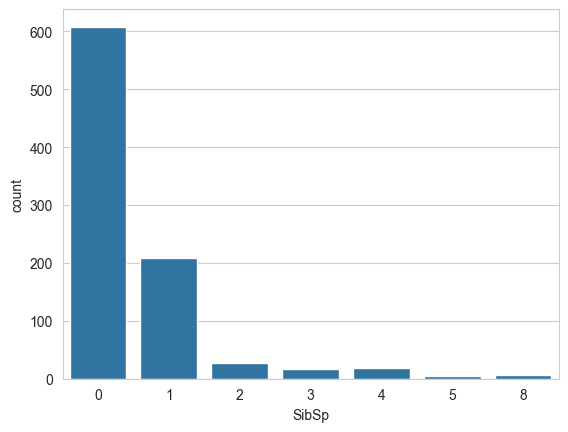

In [16]:
sns.countplot(x="SibSp",data=train)

<Axes: >

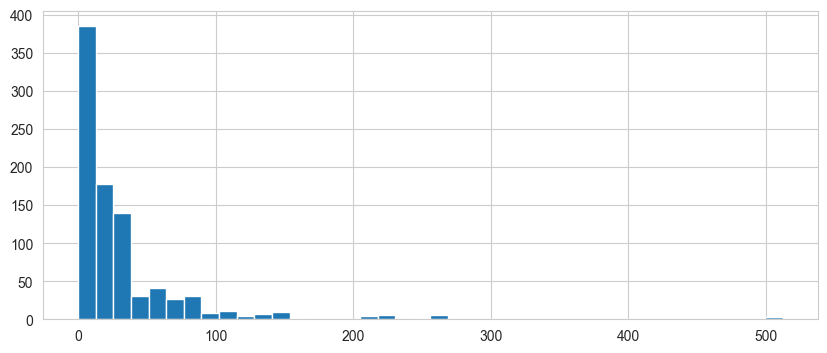

In [17]:
train["Fare"].hist(figsize=(10,4),bins=40)

In [18]:
import plotly.express as px

fig = px.histogram(train, x="Fare", nbins=40)

# Add borders around each bar
fig.update_traces(marker_line_color='black', marker_line_width=1.5)

fig.update_layout(width=1000, height=400)
fig.show()


In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Dealing with missing values

## Imputation of the Missing Values

<Axes: xlabel='Pclass', ylabel='Age'>

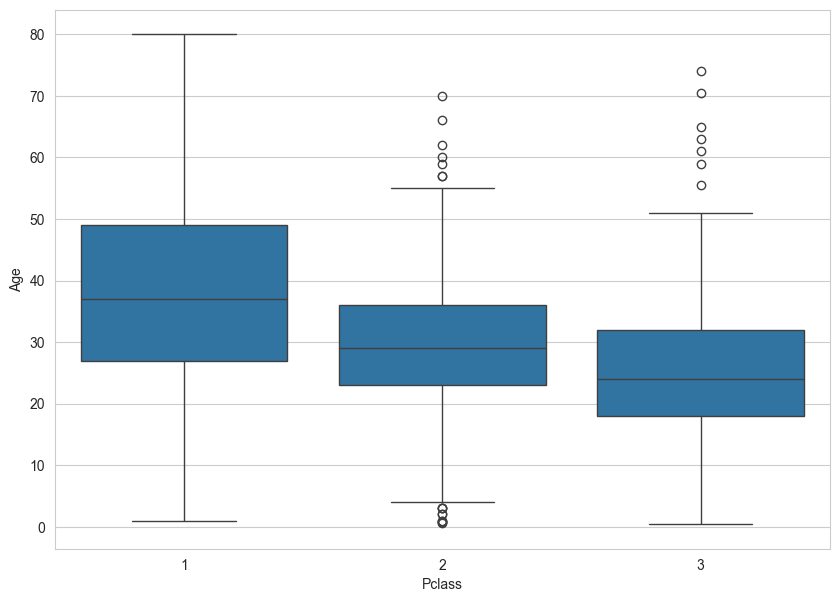

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [24]:
train.groupby('Pclass')['Age'].mean().round()


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [25]:
pclass_age_means = train.groupby('Pclass')['Age'].mean().round()

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return pclass_age_means[Pclass]
    else:
        return Age

In [27]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age,axis=1)

C:\Users\sthaa\AppData\Local\Temp\ipykernel_4592\2520418869.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sthaa\AppData\Local\Temp\ipykernel_4592\2520418869.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [28]:
train["Age"].isnull().sum()

np.int64(0)

In [29]:
train.drop("Cabin",axis=1,inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

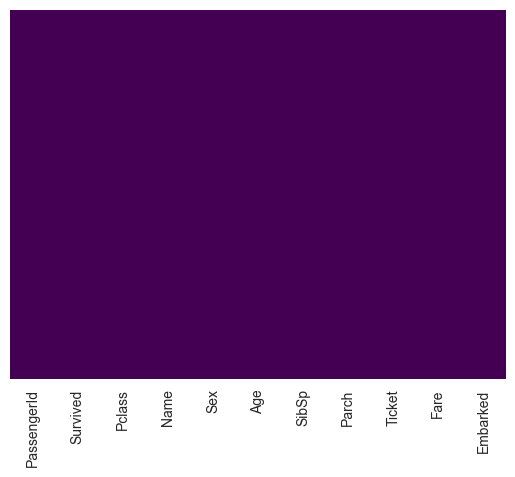

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [32]:
train["Embarked"].isnull().sum()

np.int64(2)

In [33]:
train.dropna(inplace=True)

In [34]:
train["Embarked"].isnull().sum()

np.int64(0)

In [35]:
train.duplicated().sum()

np.int64(0)

## Dealing with the Categorical Features 

In [36]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [37]:
embark = pd.get_dummies(train["Embarked"],drop_first=True)

In [38]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [39]:
train = pd.concat([train,sex,embark],axis = 1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [41]:
# dropping the columns that wont be used for training purpose

In [42]:
train.drop(["Sex","Embarked","Name","Ticket"],axis = 1,inplace=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [44]:
train.drop("PassengerId",axis = 1,inplace=True)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Model Training Process

In [46]:
X = train.drop("Survived",axis = 1)
y = train["Survived"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

d:\GITHUB repository learnings\Learnings\lrnenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [60]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])